<a href="https://colab.research.google.com/github/evakaldy/Bootcamp_Final_Project/blob/eva_database_exploration/data_transform_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA TRANFORMATION

In [ ]:
def data_transform(merged_df):
  # print(merged_df.head())
  from sklearn.preprocessing import LabelEncoder
  import numpy as np

  import pandas as pd

  merged_df['job'].unique()

  low_income = ['unemployed', 'unknown', 'housemaid',  'student', 'retired' ]
  middle_income = ['services', 'technician', 'blue-collar','admin.' ]
  high_income =[ 'entrepreneur', 'management', 'self-employed']

  # Create a new column 'job_category' based on the 'job' column
  merged_df['job_category'] = merged_df['job'].apply(
      lambda x: 'low_income' if x in low_income else
                'middle_income' if x in middle_income else
                'high_income' if x in high_income else 'Unknown'
  )
  encoder_job = LabelEncoder()
  merged_df['job_nr'] = encoder_job.fit_transform(merged_df['job_category'])
  print('JOB CATEGORY converted to number): ')
  mapping = dict(zip(encoder_job.classes_, range(len(encoder_job.classes_))))
  print(mapping)
  print()
  print('--------------------------------')

  merged_df['age'].unique()
  merged_df['age_nr'] = merged_df['age'].apply(
      lambda x: 2 if x > 60 else
                0 if x < 30 else 1
  )
  print('AGE converted to number: ')
  print("0 younger 30, 1 between 30 and 60' , 2 == older 60 ")
  print()
  print('--------------------------------')



  merged_df['pdays_nr'] = merged_df['pdays'].apply(
      lambda x: 2 if x > 250 else
                0 if x < 50 else 1
  )
  print('PDAYS converted to number: ')
  print("0 smaller 50, 1 between 50 and 250' , 2 == greater 250 ")
  print()
  print('--------------------------------')

  merged_df['education'].unique()
  merged_df['education_nr'] = merged_df['education'].apply(
      lambda x: 2 if x == 'tertiary' else
                1 if x == 'secondary' else 0
  )
  print('EDUCATION converted to number: ')
  print("2 'tertiary', 1 'secondary' , 0  'unknown' + 'primary' ")
  print()
  print('--------------------------------')

  merged_df['education'].unique()
  merged_df['education_nr'] = merged_df['education'].apply(
      lambda x: 2 if x == 'tertiary' else
                1 if x == 'secondary' else 0
  )
  print('EDUCATION converted to number: ')
  print("2 'tertiary', 1 'secondary' , 0  'unknown' + 'primary' ")
  print()
  print('--------------------------------')

  # Create a new column 'job_category' based on the 'job' column
  merged_df['job_category'] = merged_df['job'].apply(
      lambda x: 'low_income' if x in low_income else
                'middle_income' if x in middle_income else
                'high_income' if x in high_income else 'Unknown'
  )
  encoder_job = LabelEncoder()
  merged_df['job_nr'] = encoder_job.fit_transform(merged_df['job_category'])
  print('JOB CATEGORY converted to number): ')
  mapping = dict(zip(encoder_job.classes_, range(len(encoder_job.classes_))))
  print(mapping)
  print()
  print('--------------------------------')


  merged_df['balance_log'] = merged_df['balance'].apply(
      lambda x: 0 if x <=1 else
                np.log(x)  )

  print('BALANCE made logaritmic (zero for balance <1): ')
  print()
  print('--------------------------------')


  merged_df['duration_log'] = merged_df['duration'].apply(
      lambda x: 0 if x <=1 else
                np.log(x)  )

  print('DURATION made logaritmic (zero for balance <1): ')
  print()
  print('--------------------------------')


  merged_df['campaign_nr'] = merged_df['campaign'].apply(
      lambda x: 0 if x < 6  else 1
  )
  print('CAMPAIHN converted to number: ')
  print("0 for pday<6, 1 for greater values ")
  print()
  print('--------------------------------')


  merged_df['marital_nr'] = merged_df['marital'].apply(
      lambda x: 1 if x == 'married'  else 0
  )
  print('MARITAL converted to number: ')
  print("1 for married, 0 for single and divorced ")
  print()
  print('--------------------------------')


  merged_df['previous_nr'] = merged_df['previous'].apply(
      lambda x: 0 if x == 0  else 1
  )
  print('PDAYS converted to number: ')
  print("0 == 0, 1 for any other value ")
  print()
  print('--------------------------------')


  ##### CONVERT LABELS TO MUNBERS ##############


  # Create a LabelEncoder instance
  encoder_labels = LabelEncoder()



  encoder_in_default = LabelEncoder()
  merged_df['in_default_nr'] = encoder_in_default.fit_transform(merged_df['in_default'])
  print('IN_DEFAULT converted to number: ')
  mapping = dict(zip(encoder_in_default.classes_, range(len(encoder_in_default.classes_))))
  print(mapping)
  print()
  print('--------------------------------')

  encoder_housing = LabelEncoder()
  merged_df['housing_nr'] = encoder_housing.fit_transform(merged_df['housing'])
  print('HOUSING converted to number: ')
  mapping = dict(zip(encoder_housing.classes_, range(len(encoder_housing.classes_))))
  print(mapping)
  print()
  print('--------------------------------')


  encoder_loan = LabelEncoder()
  merged_df['loan_nr'] = encoder_loan.fit_transform(merged_df['loan'])
  print('LOAN converted to number: ')
  mapping = dict(zip(encoder_loan.classes_, range(len(encoder_loan.classes_))))
  print(mapping)
  print()
  print('--------------------------------')

  encoder_poutcome = LabelEncoder()
  merged_df['poutcome_nr'] = encoder_poutcome.fit_transform(merged_df['poutcome'])
  print('POUTCOME converted to number: ')
  mapping = dict(zip(encoder_poutcome.classes_, range(len(encoder_poutcome.classes_))))
  print(mapping)
  print()
  print('--------------------------------')


  encoder_y = LabelEncoder()
  merged_df['y_nr'] = encoder_y.fit_transform(merged_df['y'])
  print('Y converted to number: ')
  mapping = dict(zip(encoder_y.classes_, range(len(encoder_y.classes_))))
  print(mapping)
  print()
  print('--------------------------------')

  merged_df['education_job_nr'] = merged_df['education_nr'] + merged_df['job_nr']

  ## Create a new column with job and education
  return merged_df





In [ ]:
def statistical_difference(df_train_positive, df_train_negative):

  import pandas as pd
  from scipy import stats
  from scipy.stats import chi2_contingency

  # Assuming df_train_negative and df_train_positive are your two DataFrames

  # Exclude 'client_id' from the list of columns for comparison
  columns_to_test_continuous = ['age', 'balance', 'duration','duration_log', 'pdays', 'previous',
                    'campaign', 'balance_log']

  columns_to_test_cathegorical = ['marital_nr', 'job_nr', 'education_nr', 'age_nr', 'pdays_nr', 'previous_nr', 'campaign_nr',
                    'in_default_nr', 'housing_nr', 'loan_nr', 'poutcome_nr',  'education_job_nr']


  # Initialize an empty dictionary to store the p-values
  p_values = {}

  # Loop through each column to compute the p-value
  for column in columns_to_test_continuous:
      # Extract the two columns from the two DataFrames
      data_neg = df_train_negative[column]
      data_pos = df_train_positive[column]

      # Check normality (Shapiro-Wilk test)
      _, p_normal_neg = stats.shapiro(data_neg)
      _, p_normal_pos = stats.shapiro(data_pos)


      # If both distributions are normal, use t-test
      if p_normal_neg > 0.05 and p_normal_pos > 0.05:
          # t-test (for normally distributed data)
          t_stat, p_value = stats.ttest_ind(data_neg, data_pos)
      else:
          # Mann-Whitney U test (for non-normally distributed data)
          u_stat, p_value = stats.mannwhitneyu(data_neg, data_pos)

      # Store the p-value for the current column
      p_values[column] = p_value

      # check if the values are only binary
      # Check if a specific column is binary
      is_binary = data_neg.isin([0, 1]).all()
      # # print(f"Is binary? {is_binary}")





  for column in columns_to_test_cathegorical:
    # Extract the two columns from the two DataFrames
    data_neg = df_train_negative[column]
    data_pos = df_train_positive[column]
    all = pd.concat([data_neg, data_pos], ignore_index=True)

    categories = all.unique() # all cathegories
    # Count occurrences of each category in both DataFrames
    counts_df1 = data_neg.value_counts().reindex(categories, fill_value=0)
    counts_df2 = data_pos.value_counts().reindex(categories, fill_value=0)

    # Create a contingency table
    contingency_table = pd.DataFrame({'df1': counts_df1, 'df2': counts_df2}).T

    # Perform the Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    # print(f"column {column} is binary, chi2 {chi2}")

    # Store the p-value for the current column
    p_values[column] = p_value

  # Convert p-values dictionary to a DataFrame for easier visualization
  p_value_df = pd.DataFrame(list(p_values.items()), columns=['Column', 'p-value'])



  # Interpretation of p-value:
  # p-value < 0.05: Reject the null hypothesis, indicating a statistically significant difference between the two datasets for that column.
  # p-value >= 0.05: Fail to reject the null hypothesis, indicating no statistically significant difference between the two datasets for that column.

  stat_diff = []
  for p in p_value_df['p-value']:
    if p < 0.05:
      stat_diff.append(1)  # Append 1 for statistical difference
    else:
      stat_diff.append(0)  # Append 0 for no statistical difference



  p_value_df['statistically_different'] = stat_diff

  return p_value_df



column marital_nr is binary, chi2 18.477405856682516
column job_nr is binary, chi2 36.76973316255313
column education_nr is binary, chi2 15.1618699769161
column age_nr is binary, chi2 99.62996502477496
column pdays_nr is binary, chi2 153.4416542834824
column previous_nr is binary, chi2 117.388534999245
column campaign_nr is binary, chi2 9.271156489445623
column in_default_nr is binary, chi2 0.0
column housing_nr is binary, chi2 48.88462833144263
column loan_nr is binary, chi2 21.87182161746215
column poutcome_nr is binary, chi2 386.8773872252409
column education_job_nr is binary, chi2 1.0006728335460453
              Column        p-value  statistically_different
0                age   2.740020e-01                        0
1            balance   1.096141e-07                        1
2           duration  2.329297e-121                        1
3       duration_log  2.329297e-121                        1
4              pdays   5.717436e-24                        1
5           previous   

To compare the distributions of each column in the df_train_negative and df_train_positive datasets visually, you can use overlaid histograms or density plots (using Seaborn or Matplotlib). Here, we will generate a plot for each column, overlaying the distributions of df_train_negative and df_train_positive with different colors.

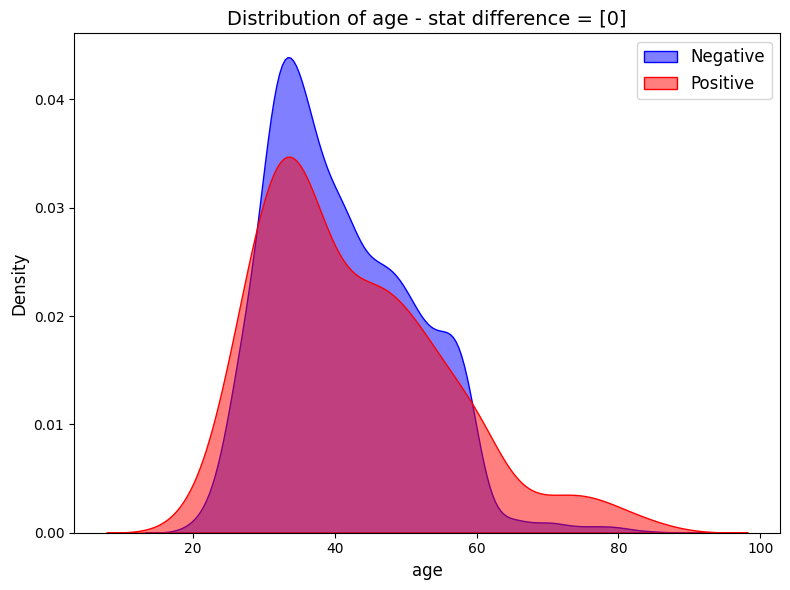

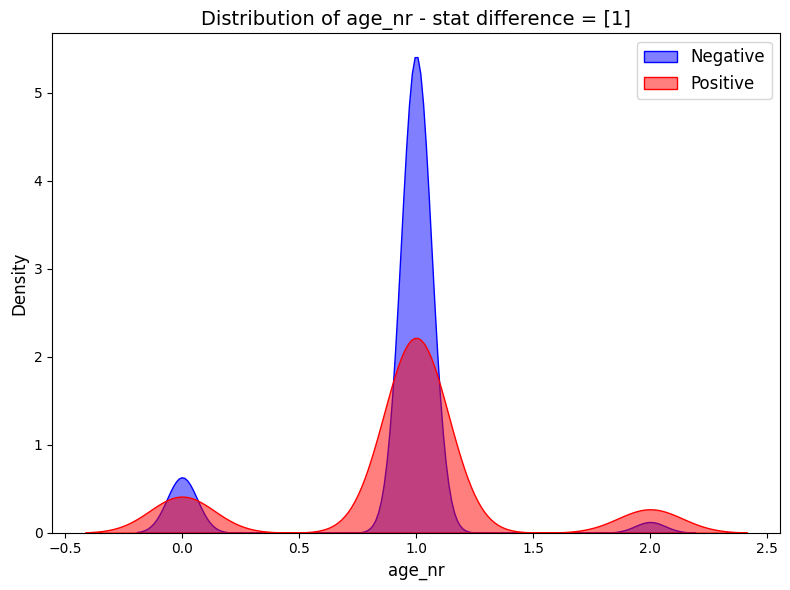

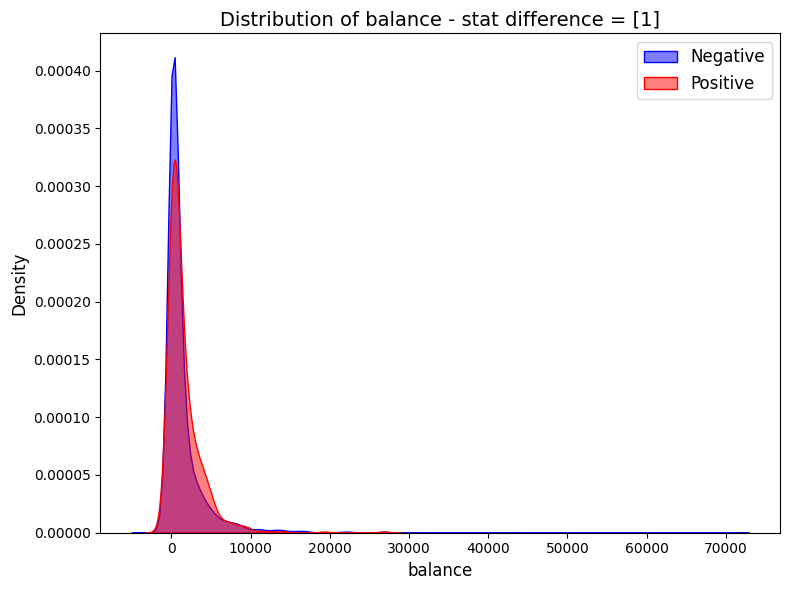

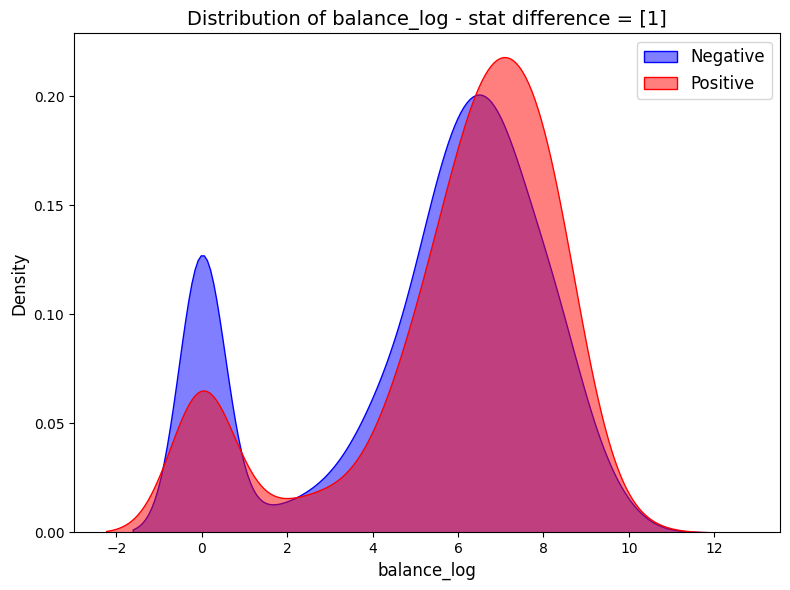

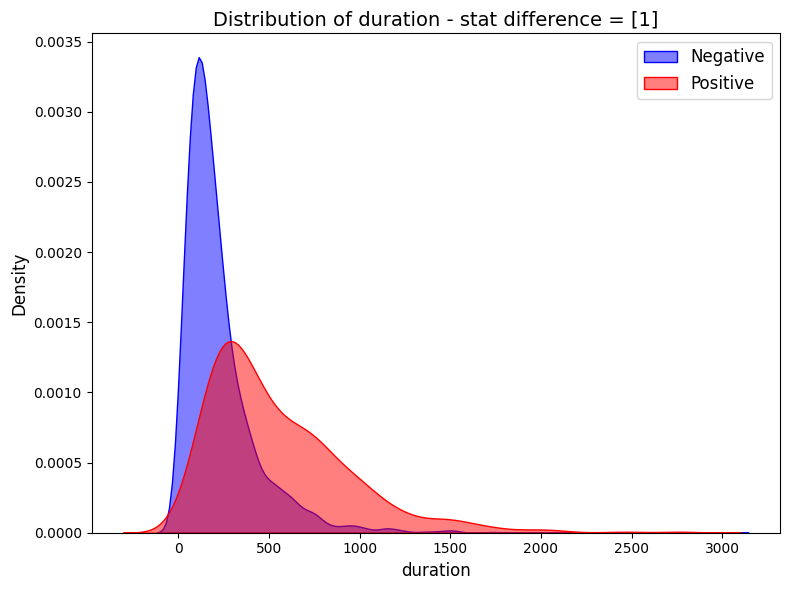

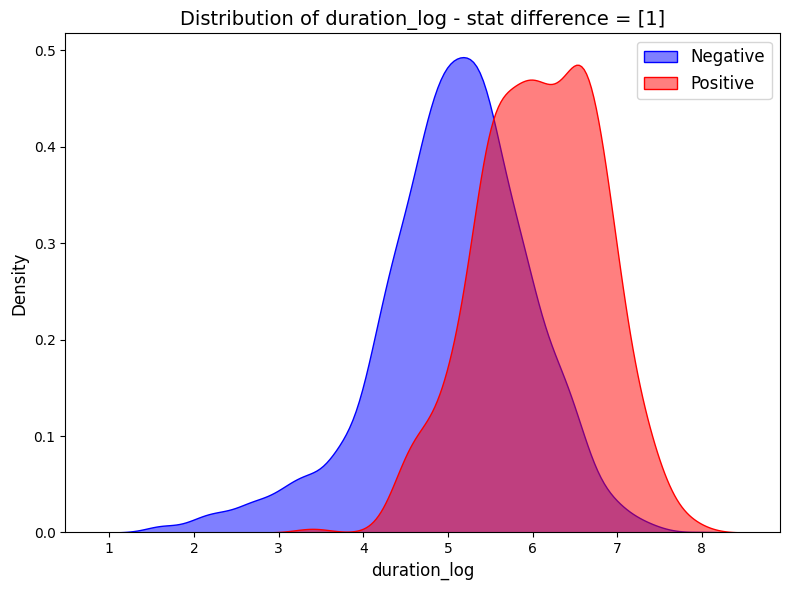

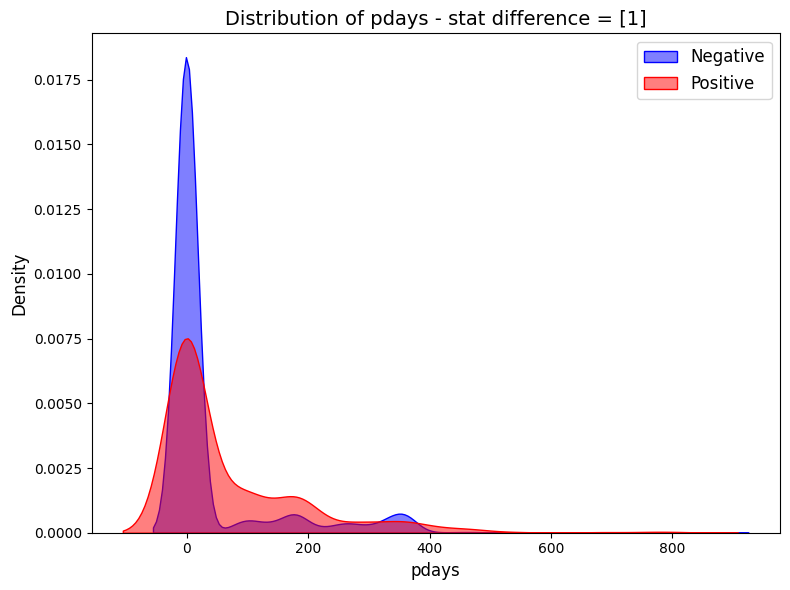

In [ ]:
def plot_variables_pvalue(df_train_positive, df_train_negative, p_value_df):

  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Assuming the dataframes `df_train_negative` and `df_train_positive` exist
  columns_to_plot = ['age', 'age_nr', 'balance', 'balance_log', 'duration', 'duration_log','pdays', 'pdays_nr', 'previous', 'previous_nr',
                    'campaign', 'campaign_nr', 'marital_nr', 'job_nr', 'education_nr',
                    'in_default_nr', 'housing_nr', 'loan_nr', 'poutcome_nr']
  # columns_to_plot = columns_to_test_continuous + columns_to_test_cathegorical
  # Set up a valid Matplotlib style
  # plt.style.use('seaborn-darkgrid')  # This sets the Seaborn Darkgrid style correctly

  # Loop through each column and create the plots
  for column in columns_to_plot:
      plt.figure(figsize=(8, 6))  # Create a new figure for each column

      # Plot histogram or density plot for df_train_negative
      sns.kdeplot(df_train_negative[column], label='Negative', color='blue', fill=True, alpha=0.5)

      # Plot histogram or density plot for df_train_positive
      sns.kdeplot(df_train_positive[column], label='Positive', color='red', fill=True, alpha=0.5)

      # Add title and labels
      plt.title(f"Distribution of {column} - stat difference = {p_value_df.loc[p_value_df['Column'] == column, 'statistically_different'].values}", fontsize=14)
      plt.xlabel(column, fontsize=12)
      plt.ylabel('Density', fontsize=12)
      plt.legend(fontsize=12)

      # Show the plot
      plt.tight_layout()
      plt.show()


